Started Dec 7,2016

# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
import os 
print os.getcwd()

/Users/parksoy/Desktop/GoogleDrive_Soyoung/Udacity_nanoDegree_MachineLearning/customer_segments


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [80]:
data.to_csv('originaldata.csv')

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,1,10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "(total N of samples)",len(data)
print "Chosen samples of wholesale customers dataset:"

display(samples)


(total N of samples) 440
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,3366,5403,12974,4400,5977,1744


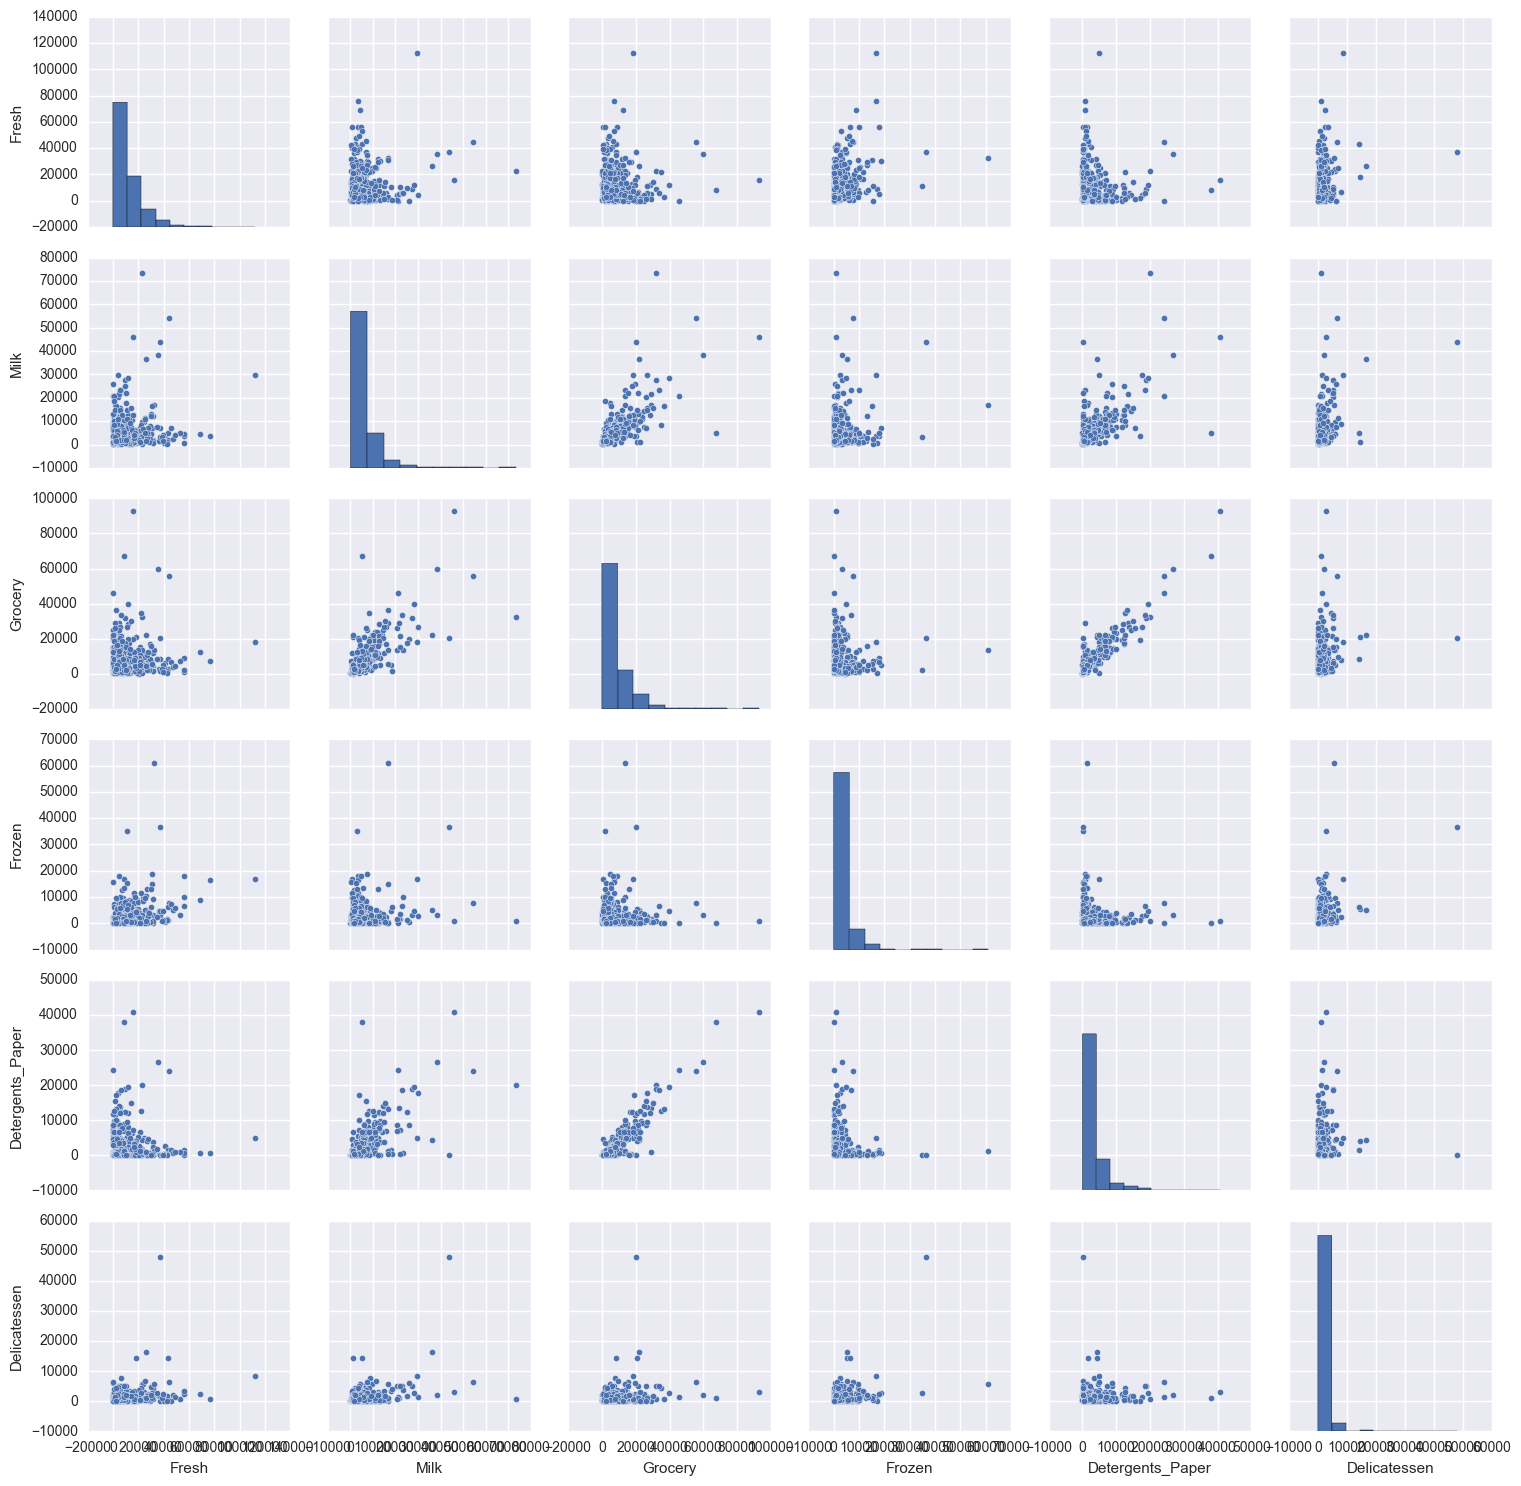

In [6]:
#EDA1
import seaborn as sns
sns.pairplot(data=data, dropna=True)

In [7]:
#EDA2
#sns.set(style="whitegrid", color_codes=True)
#sns.factorplot("Detergents_Paper", col="Grocery", data=data,  kind="count") #hue='income',col_wrap=3

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

customer	
0	Fresh/milk/grocery in order are used in majority. ==> Restaurant that uses fresh to cook.  
1	Milk/Grocery/Fresh in order are used in majority. ==> Restaurant that uses milk mainly.  
2	Grocery is dominantly used. ==> Retailers that sell grocery.  


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
item='Detergents_Paper' #Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
target=data[item]
new_data = data.drop(item,axis=1)
print "target::\n",target.head(2)
print "\nnew_data:\n", new_data.head(2)
print "\ndata:\n", data.head(2)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split #cross_validation
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = 42)
print "\nX_train::\n",X_train[:2]
print "\ny_train::\n",y_train.shape, "\n", y_train[:2]

print "\nX_test::\n",X_test[:2]
print "\ny_test::\n",y_test.shape, "\n", y_test[:2]

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
#from sklearn.naive_bayes import GaussianNB

regressor1= tree.DecisionTreeClassifier(random_state=42) 
#regressor2=GaussianNB()
print regressor1
regressor1=regressor1.fit(X_train, y_train)
print regressor1
predictions_train= regressor1.predict(X_train) 
print "\npredictions_train:\n",predictions_train.shape, "\n", predictions_train[:2] #prediction_train is numpy.ndarray.

predictions_test= regressor1.predict(X_test) 
print "\npredictions_test:\n",predictions_test.shape, "\n", predictions_test[:2]
    
# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
train_score_accuracy = accuracy_score(regressor1.predict(X_train) , y_train)# predictions_test, y_test
print "\ntrain_Score_accuracy:",train_score_accuracy 

test_score_accuracy = accuracy_score(regressor1.predict(X_test) , y_test)
print "\ntest_Score_accuracy:",test_score_accuracy 

train_score_r2 = r2_score(regressor1.predict(X_train) , y_train)
print "\ntrain_Score_r2:",train_score_r2 
  
test_score_r2 = r2_score(regressor1.predict(X_test) , y_test)
print "\ntest_Score_r2:",test_score_r2 
      

target::
0    2674
1    3293
Name: Detergents_Paper, dtype: int64

new_data:
   Fresh  Milk  Grocery  Frozen  Delicatessen
0  12669  9656     7561     214          1338
1   7057  9810     9568    1762          1776

data:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776

X_train::
     Fresh  Milk  Grocery  Frozen  Delicatessen
314  10617  1795     7647    1483          1233
3    13265  1196     4221    6404          1788

y_train::
(330,) 
314    857
3      507
Name: Detergents_Paper, dtype: int64

X_test::
     Fresh   Milk  Grocery  Frozen  Delicatessen
265   5909  23527    13699   10155          3636
78   10766   1175     2067    2096           167

y_test::
(110,) 
265    830
78     301
Name: Detergents_Paper, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nod

In [9]:
print type(X_train)
print type(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Detergents_Paper was attempted to be predicted. Accuracy is 1 for trainset, 0 for testset. Coefficient of determination (r^2)is 1 for training set, 0.21 for test set, which can be interpreted as failed to fit to the test data. The Detergents_Paper seems not a good feature to predict/identify customer's speding habit. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

type of data: <class 'pandas.core.frame.DataFrame'>


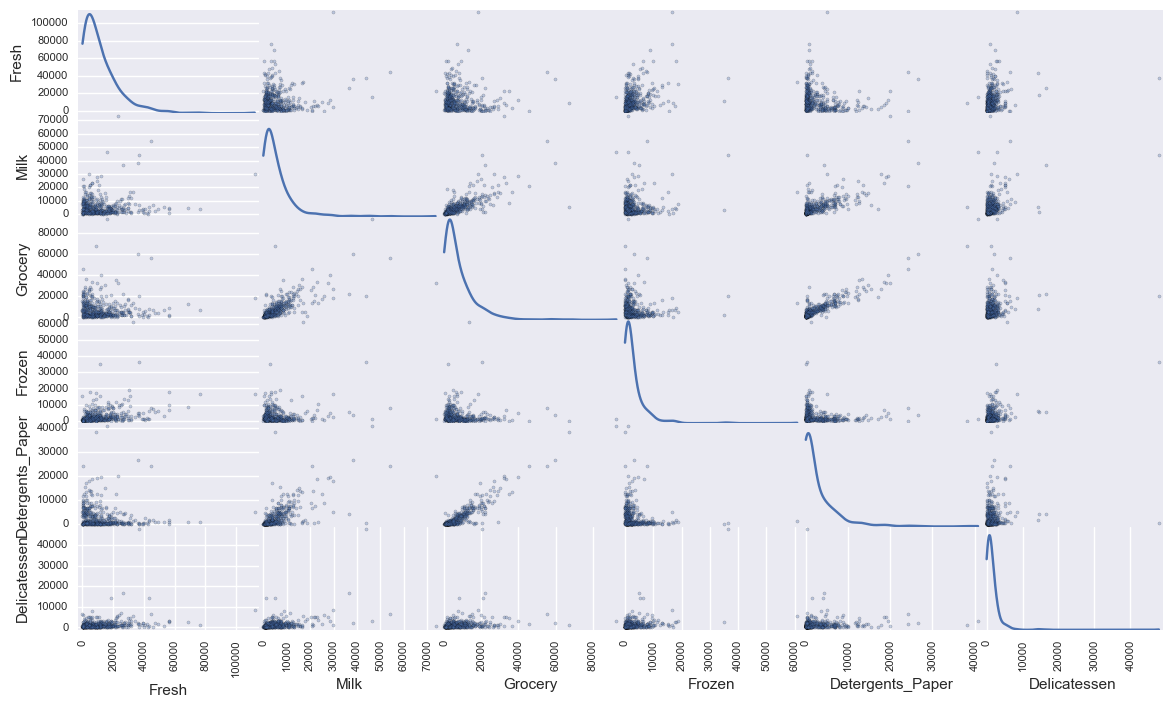

In [10]:
# Produce a scatter matrix for each pair of features in the data
print "type of data:", type(data)
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Yes, there are pairs of features with some degree of correlation-Detergents_Paper-Grocery, Grocery-Milk, Detergents_Paper-Milk pairs look somewhat correlated. My suspicion about Detergent_Paper-Grocery was confirmed to relevent, however, the prediction based on tree didn't show the same conclusion. The data is not normally distrubited, it is left skewed-most of the dataset lie on low numbers(monetary unit).This may be the reason why the original dataset might have not been well modeled with tree based regressor. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [11]:
print type(data)
print type(data.values)
print "\n"
print data.values
print "\n"
print np.log(data.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ..., 
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


[[  9.44691334   9.17533476   8.93075874   5.36597602   7.89133076
    7.19893124]
 [  8.86177531   9.19115755   9.16617948   7.47420481   8.09955428
    7.48211892]
 [  8.75668242   9.08341568   8.94689552   7.78530518   8.16507926
    8.96750419]
 ..., 
 [  9.58403958   9.64782081  10.31702003   6.0799332    9.6051489
    7.53208814]
 [  9.23892783   7.59135705   7.71065332   6.94505106   5.12396398
    7.66152708]
 [  7.93272103   7.43720637   7.82803803   4.17438727   6.16751649
    3.95124372]]


log_data: <type 'numpy.ndarray'>
log_data_pddf: <class 'pandas.core.frame.DataFrame'>
log_samples: [[  9.44691334   9.17533476   8.93075874   5.36597602   7.89133076
    7.19893124]
 [  8.86177531   9.19115755   9.16617948   7.47420481   8.09955428
    7.48211892]
 [  8.75668242   9.08341568   8.94689552   7.78530518   8.16507926
    8.96750419]
 [  9.49288427   7.08673793   8.34782735   8.76467807   6.228511
    7.48885296]
 [ 10.02636868   8.59600437   8.88155849   8.27257061   7.48268183
    8.55352512]]


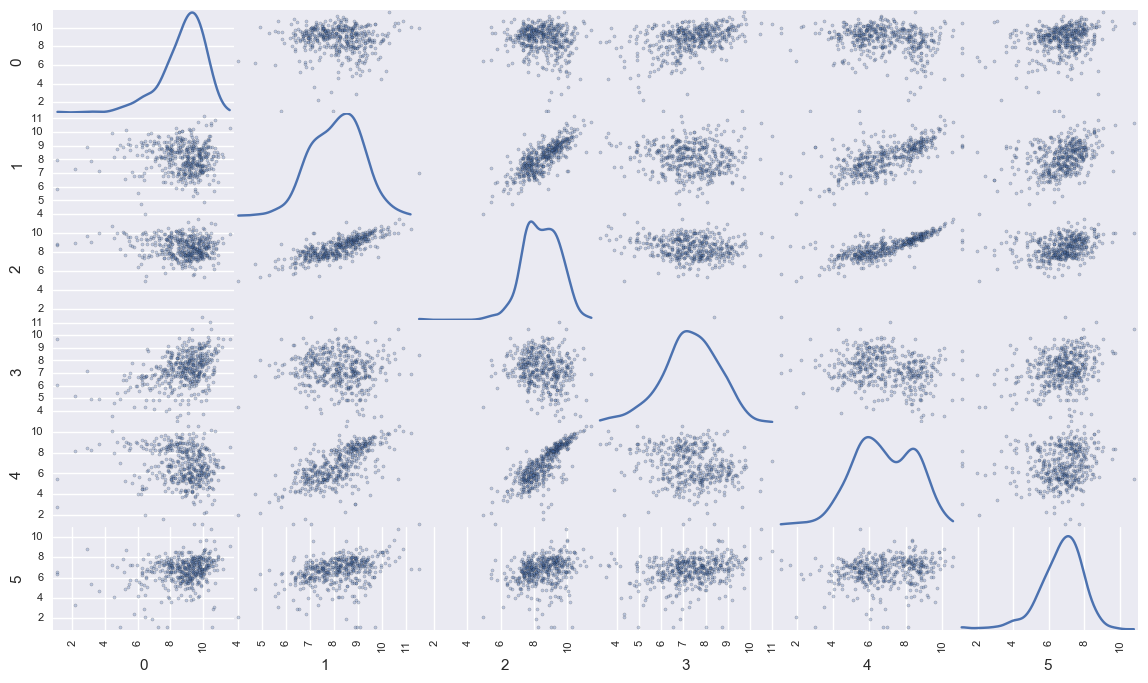

In [105]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.values)
print "log_data:",type(log_data)
log_data_pddf=pd.DataFrame(log_data)
print "log_data_pddf:",type(log_data_pddf)
   
# TODO: Scale the sample data using the natural logarithm
log_samples = log_data[:5]
print "log_samples:", log_samples

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data_pddf, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

### Answer

Earlier, I tried to identify the correlation between Detergents_Paper and Grocery in original scale. After taking natural logarithm, I see evey stronger correlation in 4:Detergents_Paper and 2:Grocery.(column # 0:Fresh,1:Milk,2:Grocery,3:Frozen,4:Detergents_Paper,5:Delicatessen). 


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [107]:
print type(log_data_pddf)
print np.percentile(log_data_pddf,25)

<class 'pandas.core.frame.DataFrame'>
6.72623340236


In [108]:
log_data_pddf.head(2)

,0,1,2,3,4,5
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119


In [109]:
#column name changed when converted to np.log and now it is back to pd.df.
#colum name needs to be changed for clarity.
#0:'Fresh',1:'Milk',2:'Grocery',3:'Frozen',4:'Detergents_Paper',5:'Delicatessen'
log_data_pddf_colRenamed=pd.DataFrame(log_data_pddf.rename
                        (columns={0:'Fresh',1:'Milk',2:'Grocery',3:'Frozen',4:'Detergents_Paper',5:'Delicatessen'}))
display(log_data_pddf_colRenamed[:2])
df_index_practice=log_data_pddf_colRenamed[:2]
print df_index_practice
print type(df_index_practice)
print df_index_practice.index.values 
print type(df_index_practice.index.values)
print df_index_practice.index.tolist() 
print type(df_index_practice.index.tolist())
#print log_data_pddf_colRenamed.head(2).index.get_values('Fresh') #Doesnt work.
#print log_data_pddf_colRenamed.head(2).index.get_level_values('Fresh').tolist() 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1  8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
<class 'pandas.core.frame.DataFrame'>
[0 1]
<type 'numpy.ndarray'>
[0, 1]
<type 'list'>


In [110]:
# For each feature find the data points with extreme high or low values
outlier_container=pd.DataFrame()

for feature in log_data_pddf_colRenamed.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data_pddf_colRenamed[feature],25)
    #print "Q1",feature, Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data_pddf_colRenamed[feature],75)
    #print "Q3", feature,Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_df=log_data_pddf_colRenamed[~((log_data_pddf_colRenamed[feature] >= Q1 - step) & 
                                        (log_data_pddf_colRenamed[feature] <= Q3 + step))]
    
    print "outlier_df[feature]::\n"
    display(outlier_df[feature]) #outlier_df 
    #print outlier_df.index
    outlier_container=outlier_container.append(outlier_df[feature])#,ignore_index=False
    print "outlier_container::\n"
    display(outlier_container)

    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = outlier_container

# Remove the outliers, if any were specified
#good_data = log_data_pddf_colRenamed.drop(log_data_pddf_colRenamed.index[outliers]).reset_index(drop = True) #Orignial given code 
good_data = log_data_pddf_colRenamed.drop(outliers).reset_index(drop = True)
display(good_data)



Data points considered outliers for the feature 'Fresh':
outlier_df[feature]::



65     4.442651
66     2.197225
81     5.389072
95     1.098612
96     3.135494
128    4.941642
171    5.298317
193    5.192957
218    2.890372
304    5.081404
305    5.493061
338    1.098612
353    4.762174
355    5.247024
357    3.610918
412    4.574711
Name: Fresh, dtype: float64

outlier_container::



,65,66,81,95,96,128,171,193,218,304,305,338,353,355,357,412
Fresh,4.442651,2.197225,5.389072,1.098612,3.135494,4.941642,5.298317,5.192957,2.890372,5.081404,5.493061,1.098612,4.762174,5.247024,3.610918,4.574711


Data points considered outliers for the feature 'Milk':
outlier_df[feature]::



86     11.205013
98      4.718499
154     4.007333
356     4.897840
Name: Milk, dtype: float64

outlier_container::



,65,66,81,95,96,128,171,193,218,304,305,338,353,355,357,412,86,98,154,356
Fresh,4.442651,2.197225,5.389072,1.098612,3.135494,4.941642,5.298317,5.192957,2.890372,5.081404,5.493061,1.098612,4.762174,5.247024,3.610918,4.574711,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.205013,4.718499,4.007333,4.89784


Data points considered outliers for the feature 'Grocery':
outlier_df[feature]::



75     1.098612
154    4.919981
Name: Grocery, dtype: float64

outlier_container::



,65,66,81,95,96,128,171,193,218,304,...,338,353,355,357,412,86,98,154,356,75
Fresh,4.442651,2.197225,5.389072,1.098612,3.135494,4.941642,5.298317,5.192957,2.890372,5.081404,...,1.098612,4.762174,5.247024,3.610918,4.574711,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.205013,4.718499,4.007333,4.89784,NaN
Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.919981,NaN,1.098612


Data points considered outliers for the feature 'Frozen':
outlier_df[feature]::



38      3.496508
57      3.637586
65      3.583519
145     3.737670
175     3.951244
264     4.110874
325    11.016479
420     3.218876
429     3.850148
439     4.174387
Name: Frozen, dtype: float64

outlier_container::



,65,66,81,95,96,128,171,193,218,304,...,75,38,57,145,175,264,325,420,429,439
Fresh,4.442651,2.197225,5.389072,1.098612,3.135494,4.941642,5.298317,5.192957,2.890372,5.081404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.098612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.496508,3.637586,3.73767,3.951244,4.110874,11.016479,3.218876,3.850148,4.174387


Data points considered outliers for the feature 'Detergents_Paper':
outlier_df[feature]::



75     1.098612
161    1.098612
Name: Detergents_Paper, dtype: float64

outlier_container::



,65,66,81,95,96,128,171,193,218,304,...,38,57,145,175,264,325,420,429,439,161
Fresh,4.442651,2.197225,5.389072,1.098612,3.135494,4.941642,5.298317,5.192957,2.890372,5.081404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.496508,3.637586,3.73767,3.951244,4.110874,11.016479,3.218876,3.850148,4.174387,NaN
Detergents_Paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612


Data points considered outliers for the feature 'Delicatessen':
outlier_df[feature]::



66      3.295837
109     1.098612
128     1.098612
137     3.583519
142     1.098612
154     2.079442
183    10.777768
184     2.397895
187     1.098612
203     2.890372
233     1.945910
285     2.890372
289     3.091042
343     3.610918
Name: Delicatessen, dtype: float64

outlier_container::



,65,66,81,95,96,128,171,193,218,304,...,137,142,183,184,187,203,233,285,289,343
Fresh,4.442651,2.197225,5.389072,1.098612,3.135494,4.941642,5.298317,5.192957,2.890372,5.081404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detergents_Paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delicatessen,NaN,3.295837,NaN,NaN,NaN,1.098612,NaN,NaN,NaN,NaN,...,3.583519,1.098612,10.777768,2.397895,1.098612,2.890372,1.94591,2.890372,3.091042,3.610918


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


In [112]:
good_data.to_csv('good_data.csv')


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are many datapoints considered as outlier based on IQR based criteria as following: 

    Data points considered outliers for the feature 'Fresh':
    outlier_df[feature]::
    65     4.442651
    66     2.197225
    81     5.389072
    95     1.098612
    96     3.135494
    128    4.941642
    171    5.298317
    193    5.192957
    218    2.890372
    304    5.081404
    305    5.493061
    338    1.098612
    353    4.762174
    355    5.247024
    357    3.610918
    412    4.574711

    Data points considered outliers for the feature 'Milk':
    outlier_df[feature]::
    86     11.205013
    98      4.718499
    154     4.007333
    356     4.897840

    Data points considered outliers for the feature 'Grocery':
    outlier_df[feature]::
    75     1.098612
    154    4.919981

    Data points considered outliers for the feature 'Frozen':
    outlier_df[feature]::
    38      3.496508
    57      3.637586
    65      3.583519
    145     3.737670
    175     3.951244
    264     4.110874
    325    11.016479
    420     3.218876
    429     3.850148
    439     4.174387

    Data points considered outliers for the feature 'Detergents_Paper':
    outlier_df[feature]::
    75     1.098612
    161    1.098612

    Data points considered outliers for the feature 'Delicatessen':
    outlier_df[feature]::
    66      3.295837
    109     1.098612
    128     1.098612
    137     3.583519
    142     1.098612
    154     2.079442
    183    10.777768
    184     2.397895
    187     1.098612
    203     2.890372
    233     1.945910
    285     2.890372
    289     3.091042
    343     3.610918


and yes, these datapoints are better to be removed from the dataset. These datapoints were added to the outliers list to be removed, because they are in the range beyond 1.5IQR, which can throw out the normality of distribution.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [121]:
log_data_pddf_colRenamed[:5]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


pca_samples:::::
[[ 1.77932162 -0.66044942 -0.82468479  1.65801648  0.09034051 -0.4807559 ]
 [ 1.88203402  0.46174133  0.27644787  0.10554787  0.09582059 -0.20928418]
 [ 1.99350697  1.24707995  1.21565188  0.61336917 -0.67320858 -0.34198358]
 [-0.99858135  1.36936442  0.28544807 -0.39970721 -0.67806977  0.61942303]
 [ 0.99384653  2.07831377  0.26141983  0.52279804 -0.49867815 -0.04378742]]


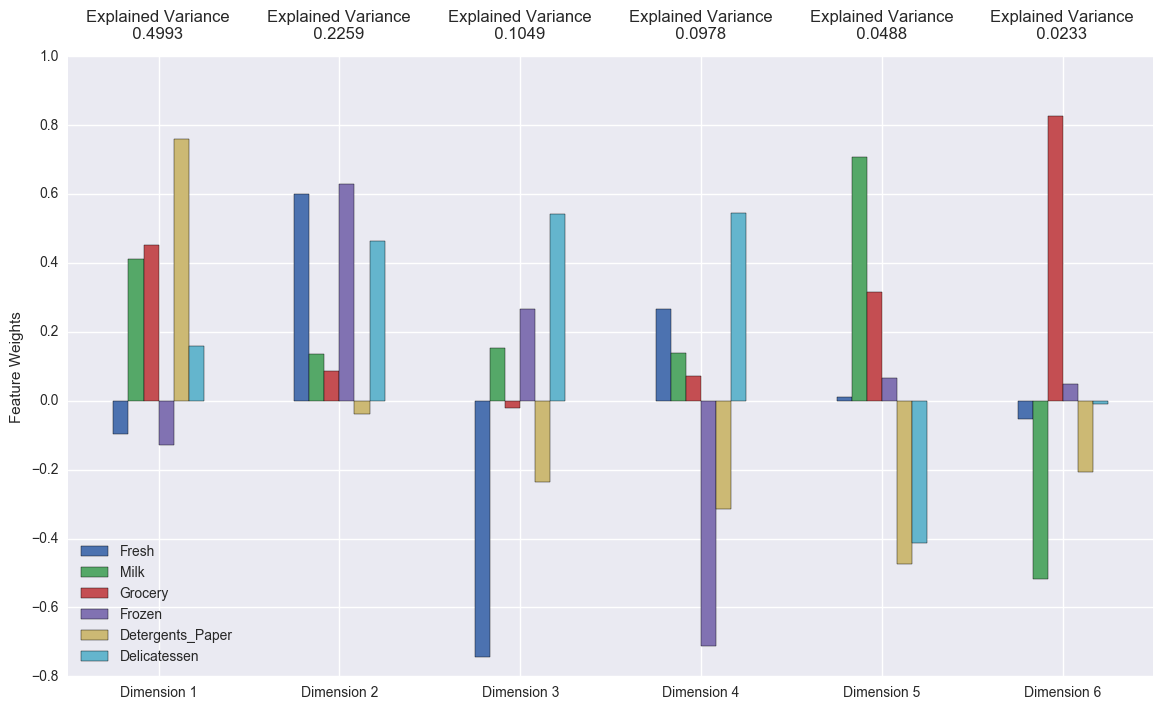

In [128]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
log_samples=log_data_pddf_colRenamed[:5]
pca_samples = pca.transform(log_samples)
print "pca_samples:::::\n", pca_samples

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

First principal component(PC) explains variance in the data 0.64, second PC explains  0.27, therefore, 0.50+0.23= 0.73 in total. First 4 PC explains 0.50+0.23+0.1+0.1=0.93.

In Dimension 1, Degergents_Paper and Grocery/milk are correlated.  
In Dimension 2, Frozen and Fresh/Delocatessen are correlated.  
In Dimension 3, Fresh(-ve) and Delicatessen are correlated.  
In Dimension 4, Frozen(-ve) and Delicatessen are correlated.  



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [130]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
2,1.9935,1.2471,1.2157,0.6134,-0.6732,-0.3420
3,-0.9986,1.3694,0.2854,-0.3997,-0.6781,0.6194
4,0.9938,2.0783,0.2614,0.5228,-0.4987,-0.0438


In [132]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


Log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. 

It is observed that the numerical values changed for the first four dimensions of the sample points. It is consistent with your initial interpretation, strong correlation between  Degergents_Paper and Grocery,etc.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [ ]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = None

# TODO: Transform the good data using the PCA fit above
reduced_data = None

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = None

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [ ]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [ ]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [ ]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = None

# TODO: Predict the cluster for each data point
preds = None

# TODO: Find the cluster centers
centers = None

# TODO: Predict the cluster for each transformed sample data point
sample_preds = None

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = None

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [ ]:
# TODO: Inverse transform the centers
log_centers = None

# TODO: Exponentiate the centers
true_centers = None

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Answer:**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.